- environment setup

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
# Wrangling
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Statistical Tests
import scipy.stats as stats
from scipy.stats import norm
# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.dates as dates
import seaborn as sns
from sklearn.model_selection import learning_curve
import datetime
pd.options.display.float_format = '{:20,.2f}'.format

# Acquisition

In [2]:
df = pd.read_csv('allservicecalls.csv')

In [3]:
df.head()

,Category,CASEID,OPENEDDATETIME,SLA_Date,CLOSEDDATETIME,Late (Yes/No),Dept,REASONNAME,TYPENAME,CaseStatus,SourceID,OBJECTDESC,Council District,XCOORD,YCOORD,Report Starting Date,Report Ending Date
0,Graffiti,1010444245,2012-08-15T00:00:00,2012-08-30T00:00:00,NaN,YES,Code Enforcement Services,Graffiti,Graffiti Public Property,Open,Web Portal,"600 NOGALITOS ST, San Antonio, 78204",5,"2,125,683.00","13,695,548.00",2020-05-15T00:00:00,2021-05-15T00:00:00
1,Property Maintenance,1010888252,2013-06-06T00:00:00,2013-08-09T00:00:00,NaN,YES,Code Enforcement Services,Code Enforcement (IntExp),Alley-Way Maintenance,Open,Web Portal,"6043 CASTLE QUEEN, San Antonio, 78218",2,"2,169,702.00","13,725,769.00",2020-05-15T00:00:00,2021-05-15T00:00:00
2,Property Maintenance,1010966128,2013-07-19T00:00:00,2013-09-23T00:00:00,NaN,YES,Code Enforcement Services,Code Enforcement (IntExp),Junk Vehicle On Private Property,Open,Web Portal,"842 KIRK PL, San Antonio, 78226",5,"2,116,192.00","13,692,260.00",2020-05-15T00:00:00,2021-05-15T00:00:00
3,Property Maintenance,1011052825,2013-09-16T00:00:00,2013-09-30T00:00:00,NaN,YES,Code Enforcement Services,Code Enforcement,Right Of Way/Sidewalk Obstruction,Open,Internal Services Requests,"54 KENROCK RIDGE, San Antonio, 78254",7,"2,082,242.00","13,737,817.00",2020-05-15T00:00:00,2021-05-15T00:00:00
4,Property Maintenance,1011052826,2013-09-16T00:00:00,2013-09-30T00:00:00,NaN,YES,Code Enforcement Services,Code Enforcement,Right Of Way/Sidewalk Obstruction,Open,Internal Services Requests,"74 KENROCK RIDGE, San Antonio, 78254",7,"2,082,389.00","13,737,877.00",2020-05-15T00:00:00,2021-05-15T00:00:00


In [4]:
df.shape

(495440, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495440 entries, 0 to 495439
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Category              495440 non-null  object 
 1   CASEID                495440 non-null  int64  
 2   OPENEDDATETIME        495440 non-null  object 
 3   SLA_Date              481300 non-null  object 
 4   CLOSEDDATETIME        441387 non-null  object 
 5   Late (Yes/No)         495440 non-null  object 
 6   Dept                  445141 non-null  object 
 7   REASONNAME            495440 non-null  object 
 8   TYPENAME              495440 non-null  object 
 9   CaseStatus            495440 non-null  object 
 10  SourceID              495440 non-null  object 
 11  OBJECTDESC            495440 non-null  object 
 12  Council District      495440 non-null  int64  
 13  XCOORD                495345 non-null  float64
 14  YCOORD                495345 non-null  float64
 15  

- OPENEDDATETIME, SLA_Date, CLOSEDDATETIME should be date time objects

- Late and CaseStatus could possibly by booleans

- dummy variables for other descrete variables?

In [6]:
df.describe()

,CASEID,Council District,XCOORD,YCOORD
count,"495,440.00","495,440.00","495,345.00","495,345.00"
mean,"1,016,457,019.17",4.76,"2,120,970.86","13,712,706.11"
std,"383,671.69",2.81,"26,661.02","27,159.70"
min,"1,010,444,245.00",0.00,"2,029,622.00","13,594,639.00"
25%,"1,016,290,069.75",2.00,"2,104,087.00","13,693,423.00"
50%,"1,016,461,548.50",5.00,"2,121,784.00","13,708,935.00"
75%,"1,016,690,961.25",7.00,"2,139,919.00","13,731,106.00"
max,"1,016,870,506.00",10.00,"2,235,998.00","13,816,361.00"


In [7]:
df.isnull().sum()

Category                    0
CASEID                      0
OPENEDDATETIME              0
SLA_Date                14140
CLOSEDDATETIME          54053
Late (Yes/No)               0
Dept                    50299
REASONNAME                  0
TYPENAME                    0
CaseStatus                  0
SourceID                    0
OBJECTDESC                  0
Council District            0
XCOORD                     95
YCOORD                     95
Report Starting Date        0
Report Ending Date          0
dtype: int64

- quite a few missing in SLA_Date, CLOSEDDATETIME, and Dept

In [8]:
null_SLA_Date = df[df['SLA_Date'].isnull()]

In [9]:
null_SLA_Date.head()

,Category,CASEID,OPENEDDATETIME,SLA_Date,CLOSEDDATETIME,Late (Yes/No),Dept,REASONNAME,TYPENAME,CaseStatus,SourceID,OBJECTDESC,Council District,XCOORD,YCOORD,Report Starting Date,Report Ending Date
3747,Information,1014795284,2018-08-18T00:00:00,NaN,NaN,NO,City Council,District 2,Request for Research/Information,Open,Constituent Call,"100 MAY, San Antonio, 78202",2,"2,137,325.00","13,702,167.00",2020-05-15T00:00:00,2021-05-15T00:00:00
11020,No Category,1015979271,2019-12-16T00:00:00,NaN,2020-08-05T00:00:00,NO,Development Services,Code Enforcement,Dangerous Assessment Response Team Investigation,Closed,311 Mobile App,"306 KOEHLER COURT, SAN ANTONIO, 78223",3,"2,139,573.00","13,681,025.00",2020-05-15T00:00:00,2021-05-15T00:00:00
13084,No Category,1016000957,2020-01-06T00:00:00,NaN,2021-04-02T00:00:00,NO,Development Services,Code Enforcement,DP Warrant Assessment,Closed,311 Mobile App,"416 DEWITT ST, SAN ANTONIO, 78204",5,"2,125,753.00","13,691,306.00",2020-05-15T00:00:00,2021-05-15T00:00:00
13739,No Category,1016013025,2020-01-14T00:00:00,NaN,NaN,NO,Development Services,Code Enforcement,Dangerous Assessment Response Team Investigation,Open,311 Mobile App,"7526 BARRYHILL, SAN ANTONIO, 78238",7,"2,084,277.00","13,728,306.00",2020-05-15T00:00:00,2021-05-15T00:00:00
13830,No Category,1016014442,2020-01-15T00:00:00,NaN,NaN,NO,Development Services,Code Enforcement,Dangerous Assessment Response Team Investigation,Open,311 Mobile App,"306 CHIPINQUE, SAN ANTONIO, 78237",5,"2,110,975.00","13,697,399.00",2020-05-15T00:00:00,2021-05-15T00:00:00


In [10]:
null_SLA_Date.isnull().sum()

Category                    0
CASEID                      0
OPENEDDATETIME              0
SLA_Date                14140
CLOSEDDATETIME           4540
Late (Yes/No)               0
Dept                    11356
REASONNAME                  0
TYPENAME                    0
CaseStatus                  0
SourceID                    0
OBJECTDESC                  0
Council District            0
XCOORD                      0
YCOORD                      0
Report Starting Date        0
Report Ending Date          0
dtype: int64

In [11]:
null_SLA_Date.Category.value_counts()

No Category    14139
Information        1
Name: Category, dtype: int64

In [12]:
null_SLA_Date.SourceID.value_counts()

Web Portal          11356
311 Mobile App       2783
Constituent Call        1
Name: SourceID, dtype: int64

In [13]:
null_SLA_Date.REASONNAME.value_counts()

Small Business           6106
Workforce Development    5250
Code Enforcement         2783
District 2                  1
Name: REASONNAME, dtype: int64

In [14]:
null_SLA_Date['Late (Yes/No)'].value_counts()

NO    14140
Name: Late (Yes/No), dtype: int64

In [15]:
null_SLA_Date.Dept.value_counts()

Development Services    2783
City Council               1
Name: Dept, dtype: int64

In [16]:
null_SLA_Date.CaseStatus.value_counts()

Closed    9600
Open      4540
Name: CaseStatus, dtype: int64

In [17]:
null_SLA_Date['Council District'].value_counts()

1     2343
2     1605
8     1408
3     1379
7     1294
5     1288
9     1234
6     1181
10    1144
4     1111
0      153
Name: Council District, dtype: int64

In [18]:
null_SLA_Date['OBJECTDESC'].value_counts()

Market Square,  514 W COMMERCE ST, SAN ANTONIO, 78207    47
 910 SE MILITARY DR, SAN ANTONIO, 78214                  24
 10919 CULEBRA RD, SAN ANTONIO, 78253                    21
612  W COMMERCE ST, SAN ANTONIO                          20
 999 E BASSE RD, SAN ANTONIO, 78209                      18
                                                         ..
 3318 SE MILITARY DR, SAN ANTONIO, 78223                  1
BRENDELL ST and LARK                                      1
 8319 SETTING MOON, SAN ANTONIO, 78255                    1
 8112 TEZEL RD, SAN ANTONIO, 78250                        1
 7015 HEATHERS POND, SAN ANTONIO, 78227                   1
Name: OBJECTDESC, Length: 10671, dtype: int64

- almost all null_SLA_Date observations are missing dept
    - those that do, all but 1 say developmental services


- all but 1 have no category

- none are listed as late

- only about 1/3rd are still open

- possibly cases that have not been assigned? Maybe a case was never created?


In [19]:
list(df.columns)

['Category',
 'CASEID',
 'OPENEDDATETIME',
 'SLA_Date',
 'CLOSEDDATETIME',
 'Late (Yes/No)',
 'Dept',
 'REASONNAME',
 'TYPENAME',
 'CaseStatus',
 'SourceID',
 'OBJECTDESC',
 'Council District',
 'XCOORD',
 'YCOORD',
 'Report Starting Date',
 'Report Ending Date']

In [20]:
df.Category.value_counts()

No Category                  415187
Solid Waste Services          63005
Property Maintenance           5212
Animals                        4754
Information                    4197
Scooters                       1008
Graffiti                        820
Parks                           496
Traffic Signals and Signs       438
Streets & Infrastructure        315
Historic Preservation             8
Name: Category, dtype: int64

<AxesSubplot:>

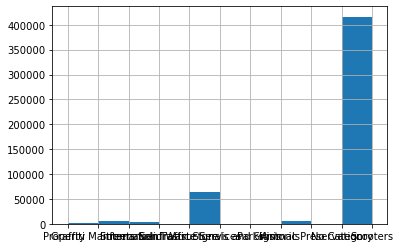

In [21]:
df.Category.hist()

In [22]:
df['Late (Yes/No)'].value_counts()

NO     400740
YES     94700
Name: Late (Yes/No), dtype: int64

<AxesSubplot:>

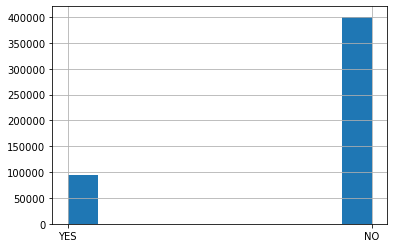

In [23]:
df['Late (Yes/No)'].hist()

In [24]:
df.Dept.value_counts()

Solid Waste Management       190658
Development Services         132826
Animal Care Services          75222
Trans & Cap Improvements      33684
Code Enforcement Services      5294
Customer Service               4196
Metro Health                   2827
Parks and Recreation            433
City Council                      1
Name: Dept, dtype: int64

<AxesSubplot:>

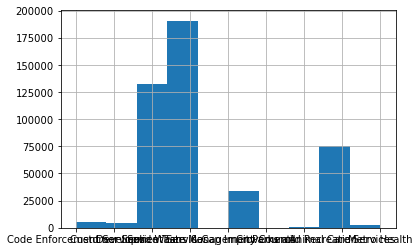

In [25]:
df.Dept.hist()

In [26]:
df.REASONNAME.value_counts()

Waste Collection                 152898
Code Enforcement                 136050
Field Operations                  75100
Miscellaneous                     30407
Traffic Operations                26148
Streets                           25816
Trades                             9590
Stormwater                         6797
Small Business                     6106
Solid Waste                        5261
Workforce Development              5250
Customer Service                   4650
311 Call Center                    4196
Food Establishments                1610
Land Development                   1094
Facility License                    908
Clean and Green                     758
Dangerous Premise                   701
Shops (Internal)                    385
Vector                              243
Historic Preservation               224
Signals                             223
Urban Forestry                      209
Traffic Engineering Design          206
Graffiti (IntExp)                   112


<AxesSubplot:>

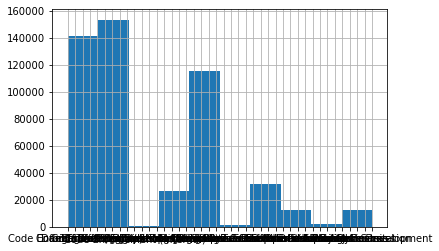

In [27]:
df.REASONNAME.hist()

In [28]:
df.TYPENAME.value_counts()

No Pickup                                             61856
Overgrown Yard/Trash                                  28777
Dead Animal Pick Up                                   24510
Carts(Damaged Cart)                                   20407
Carts(Cart Exchange)                                  16590
                                                      ...  
Sanitation (Natural Areas-Mutt Mitt Restock)              1
Parks Internal (Sanitation_NA-Port Toilet Service)        1
Basketball Goals on R.O.W.                                1
Bulk Missed Pick up                                       1
Parks Mowing                                              1
Name: TYPENAME, Length: 442, dtype: int64

In [29]:
df.CaseStatus.value_counts()

Closed    441387
Open       54053
Name: CaseStatus, dtype: int64

<AxesSubplot:>

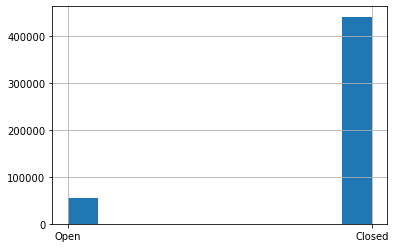

In [30]:
df.CaseStatus.hist()

In [31]:
df['Council District'].value_counts()

5     67022
1     66543
2     65327
3     62330
4     46830
7     46377
6     42719
10    40062
8     27924
9     27473
0      2833
Name: Council District, dtype: int64

<AxesSubplot:>

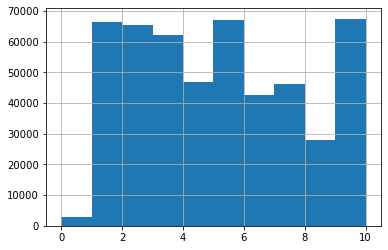

In [32]:
df['Council District'].hist()

In [33]:
null_CLOSEDDATETIME = df[df['CLOSEDDATETIME'].isnull()]

In [34]:
null_CLOSEDDATETIME.head()

,Category,CASEID,OPENEDDATETIME,SLA_Date,CLOSEDDATETIME,Late (Yes/No),Dept,REASONNAME,TYPENAME,CaseStatus,SourceID,OBJECTDESC,Council District,XCOORD,YCOORD,Report Starting Date,Report Ending Date
0,Graffiti,1010444245,2012-08-15T00:00:00,2012-08-30T00:00:00,NaN,YES,Code Enforcement Services,Graffiti,Graffiti Public Property,Open,Web Portal,"600 NOGALITOS ST, San Antonio, 78204",5,"2,125,683.00","13,695,548.00",2020-05-15T00:00:00,2021-05-15T00:00:00
1,Property Maintenance,1010888252,2013-06-06T00:00:00,2013-08-09T00:00:00,NaN,YES,Code Enforcement Services,Code Enforcement (IntExp),Alley-Way Maintenance,Open,Web Portal,"6043 CASTLE QUEEN, San Antonio, 78218",2,"2,169,702.00","13,725,769.00",2020-05-15T00:00:00,2021-05-15T00:00:00
2,Property Maintenance,1010966128,2013-07-19T00:00:00,2013-09-23T00:00:00,NaN,YES,Code Enforcement Services,Code Enforcement (IntExp),Junk Vehicle On Private Property,Open,Web Portal,"842 KIRK PL, San Antonio, 78226",5,"2,116,192.00","13,692,260.00",2020-05-15T00:00:00,2021-05-15T00:00:00
3,Property Maintenance,1011052825,2013-09-16T00:00:00,2013-09-30T00:00:00,NaN,YES,Code Enforcement Services,Code Enforcement,Right Of Way/Sidewalk Obstruction,Open,Internal Services Requests,"54 KENROCK RIDGE, San Antonio, 78254",7,"2,082,242.00","13,737,817.00",2020-05-15T00:00:00,2021-05-15T00:00:00
4,Property Maintenance,1011052826,2013-09-16T00:00:00,2013-09-30T00:00:00,NaN,YES,Code Enforcement Services,Code Enforcement,Right Of Way/Sidewalk Obstruction,Open,Internal Services Requests,"74 KENROCK RIDGE, San Antonio, 78254",7,"2,082,389.00","13,737,877.00",2020-05-15T00:00:00,2021-05-15T00:00:00


In [35]:
null_CLOSEDDATETIME.isnull().sum()

Category                    0
CASEID                      0
OPENEDDATETIME              0
SLA_Date                 4540
CLOSEDDATETIME          54053
Late (Yes/No)               0
Dept                     8396
REASONNAME                  0
TYPENAME                    0
CaseStatus                  0
SourceID                    0
OBJECTDESC                  0
Council District            0
XCOORD                      4
YCOORD                      4
Report Starting Date        0
Report Ending Date          0
dtype: int64

In [36]:
null_CLOSEDDATETIME.Category.value_counts()

No Category                  44352
Property Maintenance          3470
Solid Waste Services          3459
Animals                        978
Scooters                       770
Parks                          475
Traffic Signals and Signs      339
Graffiti                       130
Streets & Infrastructure        71
Historic Preservation            8
Information                      1
Name: Category, dtype: int64

In [37]:
null_CLOSEDDATETIME.SourceID.value_counts()

Web Portal                    33712
311 Mobile App                11897
Constituent Call               5440
Internal Services Requests     3004
Name: SourceID, dtype: int64

In [38]:
null_CLOSEDDATETIME.shape

(54053, 17)

In [39]:
null_CLOSEDDATETIME['Late (Yes/No)'].value_counts()

YES    34320
NO     19733
Name: Late (Yes/No), dtype: int64

In [40]:
null_CLOSEDDATETIME.Dept.value_counts()

Development Services         23019
Solid Waste Management        8055
Animal Care Services          6924
Code Enforcement Services     3531
Trans & Cap Improvements      3470
Parks and Recreation           428
Metro Health                   229
City Council                     1
Name: Dept, dtype: int64

In [41]:
null_CLOSEDDATETIME.CaseStatus.value_counts()

Open    54053
Name: CaseStatus, dtype: int64

In [42]:
null_CLOSEDDATETIME['Council District'].value_counts()

2     7816
1     7800
5     7432
3     6096
7     5699
6     5380
4     4974
10    3619
8     2622
9     2317
0      298
Name: Council District, dtype: int64

In [43]:
#df= df.rename(columns={
 #                   'Category':'category', 'OPENEDDATETIME':'open_date', 'Dept': 'dept',
  #                  'SLA_Date':'sla_date', 'CLOSEDDATETIME': 'closed_date', 'Late (Yes/No)': 'late',
   #                 'OBJECTDESC': 'address', 'REASONNAME': 'reason', 'TYPENAME': 'type', 
    #                'Council District': 'council_district', 'CASEID': 'case_id',
     #               'CaseStatus': 'case_status', 'SourceID':'source_id', 'XCOORD': 'x_coord', 'YCOORD': 'y_coord',
      #              'Report Starting Date': 'report_start_date', 'Report Ending Date': 'report_end_date'
       #               })

# Prepare

### John Funcitons
- Make reason type easier to manage by combining some of the reasons?
    - Waste Collection + Solid Waste
        - Into just 'Waste Management'
    - Storm Water + Storm Water Engineering + Stormwater
        - Into 'Storm Water Managemnt'
    - Ect.

In [44]:
df.head()

,Category,CASEID,OPENEDDATETIME,SLA_Date,CLOSEDDATETIME,Late (Yes/No),Dept,REASONNAME,TYPENAME,CaseStatus,SourceID,OBJECTDESC,Council District,XCOORD,YCOORD,Report Starting Date,Report Ending Date
0,Graffiti,1010444245,2012-08-15T00:00:00,2012-08-30T00:00:00,NaN,YES,Code Enforcement Services,Graffiti,Graffiti Public Property,Open,Web Portal,"600 NOGALITOS ST, San Antonio, 78204",5,"2,125,683.00","13,695,548.00",2020-05-15T00:00:00,2021-05-15T00:00:00
1,Property Maintenance,1010888252,2013-06-06T00:00:00,2013-08-09T00:00:00,NaN,YES,Code Enforcement Services,Code Enforcement (IntExp),Alley-Way Maintenance,Open,Web Portal,"6043 CASTLE QUEEN, San Antonio, 78218",2,"2,169,702.00","13,725,769.00",2020-05-15T00:00:00,2021-05-15T00:00:00
2,Property Maintenance,1010966128,2013-07-19T00:00:00,2013-09-23T00:00:00,NaN,YES,Code Enforcement Services,Code Enforcement (IntExp),Junk Vehicle On Private Property,Open,Web Portal,"842 KIRK PL, San Antonio, 78226",5,"2,116,192.00","13,692,260.00",2020-05-15T00:00:00,2021-05-15T00:00:00
3,Property Maintenance,1011052825,2013-09-16T00:00:00,2013-09-30T00:00:00,NaN,YES,Code Enforcement Services,Code Enforcement,Right Of Way/Sidewalk Obstruction,Open,Internal Services Requests,"54 KENROCK RIDGE, San Antonio, 78254",7,"2,082,242.00","13,737,817.00",2020-05-15T00:00:00,2021-05-15T00:00:00
4,Property Maintenance,1011052826,2013-09-16T00:00:00,2013-09-30T00:00:00,NaN,YES,Code Enforcement Services,Code Enforcement,Right Of Way/Sidewalk Obstruction,Open,Internal Services Requests,"74 KENROCK RIDGE, San Antonio, 78254",7,"2,082,389.00","13,737,877.00",2020-05-15T00:00:00,2021-05-15T00:00:00


In [45]:
df.REASONNAME.value_counts()

Waste Collection                 152898
Code Enforcement                 136050
Field Operations                  75100
Miscellaneous                     30407
Traffic Operations                26148
Streets                           25816
Trades                             9590
Stormwater                         6797
Small Business                     6106
Solid Waste                        5261
Workforce Development              5250
Customer Service                   4650
311 Call Center                    4196
Food Establishments                1610
Land Development                   1094
Facility License                    908
Clean and Green                     758
Dangerous Premise                   701
Shops (Internal)                    385
Vector                              243
Historic Preservation               224
Signals                             223
Urban Forestry                      209
Traffic Engineering Design          206
Graffiti (IntExp)                   112


In [46]:
# make lists of values

waste = ['Waste Collection', 'Solid Waste']

code = ['Code Enforcement', 'Code Enforcement (Internal)', 'Code Enforcement (IntExp)']

field = ['Field Operations']

misc = ['Miscellaneous']

traffic = ['Traffic Operations', 'Traffic Engineering Design', 'Traffic Issue Investigation']

streets = ['Streets', 'Signals', 'Signs and Markings']

trades = ['Trades']

storm = ['Stormwater', 'Storm Water', 'Storm Water Engineering']

business = ['Small Business', 'Food Establishments', 'Shops (Internal)', 'Shops']

workforce = ['Workforce Development']

customer_service = ['Customer Service', '311 Call Center', 'Director\'s Office Horizontal']

land = ['Land Development', 'Clean and Green', 'Urban Forestry', 'Natural Resources', 'Park Projects', 'Tree Crew', 'District 2', 'Clean and Green Natural Areas']

licenses = ['Facility License']

buildings = ['Dangerous Premise','Historic Preservation', 'Engineering Division']

pests = ['Vector']

cleanup = ['Graffiti (IntExp)', 'General Sanitation', 'Graffiti', 'Brush']

In [47]:
# make list of lists 
lists = [waste, code, field, misc, traffic, streets, trades, storm, business, workforce, customer_service, land, licenses, buildings, pests, cleanup]

In [48]:
lists

[['Waste Collection', 'Solid Waste'],
 ['Code Enforcement',
  'Code Enforcement (Internal)',
  'Code Enforcement (IntExp)'],
 ['Field Operations'],
 ['Miscellaneous'],
 ['Traffic Operations',
  'Traffic Engineering Design',
  'Traffic Issue Investigation'],
 ['Streets', 'Signals', 'Signs and Markings'],
 ['Trades'],
 ['Stormwater', 'Storm Water', 'Storm Water Engineering'],
 ['Small Business', 'Food Establishments', 'Shops (Internal)', 'Shops'],
 ['Workforce Development'],
 ['Customer Service', '311 Call Center', "Director's Office Horizontal"],
 ['Land Development',
  'Clean and Green',
  'Urban Forestry',
  'Natural Resources',
  'Park Projects',
  'Tree Crew',
  'District 2',
  'Clean and Green Natural Areas'],
 ['Facility License'],
 ['Dangerous Premise', 'Historic Preservation', 'Engineering Division'],
 ['Vector'],
 ['Graffiti (IntExp)', 'General Sanitation', 'Graffiti', 'Brush']]

In [49]:
df['REASONNAME'] = df['REASONNAME'].replace(['Waste Collection', 'Solid Waste', 'Brush'], 'waste')

df['REASONNAME'] = df['REASONNAME'].replace(['Code Enforcement', 'Code Enforcement (Internal)', 'Code Enforcement (IntExp)'], 'code')

df['REASONNAME'] = df['REASONNAME'].replace(['Field Operations', 'Vector'], 'field')

df['REASONNAME'] = df['REASONNAME'].replace('Miscellaneous', 'misc')

df['REASONNAME'] = df['REASONNAME'].replace(['Traffic Operations', 'Traffic Engineering Design', 'Traffic Issue Investigation'], 'traffic')

df['REASONNAME'] = df['REASONNAME'].replace(['Streets', 'Signals', 'Signs and Markings'], 'streets')

df['REASONNAME'] = df['REASONNAME'].replace('Trades', 'trades')

df['REASONNAME'] = df['REASONNAME'].replace(['Stormwater', 'Storm Water', 'Storm Water Engineering'], 'storm')

df['REASONNAME'] = df['REASONNAME'].replace(['Small Business', 'Food Establishments', 'Shops (Internal)', 'Shops'], 'business')

df['REASONNAME'] = df['REASONNAME'].replace('Workforce Development', 'workforce')

df['REASONNAME'] = df['REASONNAME'].replace(['Customer Service', '311 Call Center', 'Director\'s Office Horizontal'], 'customer_service')

df['REASONNAME'] = df['REASONNAME'].replace(['Land Development', 'Clean and Green', 'Urban Forestry', 'Natural Resources', 'Park Projects', 'Tree Crew', 'District 2', 'Clean and Green Natural Areas'], 'land')

df['REASONNAME'] = df['REASONNAME'].replace('Facility License', 'license')

df['REASONNAME'] = df['REASONNAME'].replace(['Dangerous Premise','Historic Preservation', 'Engineering Division'], 'buildings')

df['REASONNAME'] = df['REASONNAME'].replace(['Graffiti (IntExp)', 'General Sanitation', 'Graffiti'], 'cleanup')

df['REASONNAME'] = df['REASONNAME'].replace(['Waste Collection', 'Solid Waste'], 'waste')

df['REASONNAME'] = df['REASONNAME'].replace(['Waste Collection', 'Solid Waste'], 'waste')

In [50]:
df.REASONNAME.value_counts()

waste               158168
code                136153
field                75343
misc                 30407
traffic              26355
streets              26061
trades                9590
customer_service      8856
business              8102
storm                 6828
workforce             5250
land                  2198
buildings             1033
license                908
cleanup                188
Name: REASONNAME, dtype: int64

In [52]:
def clean_reason(df):
    
    '''
    This function will take in the service call df and replace the content of REASONNAME column with condensed names
    '''
    
    df['REASONNAME'] = df['REASONNAME'].replace(['Waste Collection', 'Solid Waste', 'Brush'], 'waste')

    df['REASONNAME'] = df['REASONNAME'].replace(['Code Enforcement', 'Code Enforcement (Internal)', 'Code Enforcement (IntExp)'], 'code')

    df['REASONNAME'] = df['REASONNAME'].replace(['Field Operations', 'Vector'], 'field')

    df['REASONNAME'] = df['REASONNAME'].replace('Miscellaneous', 'misc')

    df['REASONNAME'] = df['REASONNAME'].replace(['Traffic Operations', 'Traffic Engineering Design', 'Traffic Issue Investigation'], 'traffic')

    df['REASONNAME'] = df['REASONNAME'].replace(['Streets', 'Signals', 'Signs and Markings'], 'streets')

    df['REASONNAME'] = df['REASONNAME'].replace('Trades', 'trades')

    df['REASONNAME'] = df['REASONNAME'].replace(['Stormwater', 'Storm Water', 'Storm Water Engineering'], 'storm')

    df['REASONNAME'] = df['REASONNAME'].replace(['Small Business', 'Food Establishments', 'Shops (Internal)', 'Shops'], 'business')

    df['REASONNAME'] = df['REASONNAME'].replace('Workforce Development', 'workforce')

    df['REASONNAME'] = df['REASONNAME'].replace(['Customer Service', '311 Call Center', 'Director\'s Office Horizontal'], 'customer_service')

    df['REASONNAME'] = df['REASONNAME'].replace(['Land Development', 'Clean and Green', 'Urban Forestry', 'Natural Resources', 'Park Projects', 'Tree Crew', 'District 2', 'Clean and Green Natural Areas'], 'land')

    df['REASONNAME'] = df['REASONNAME'].replace('Facility License', 'license')

    df['REASONNAME'] = df['REASONNAME'].replace(['Dangerous Premise','Historic Preservation', 'Engineering Division'], 'buildings')

    df['REASONNAME'] = df['REASONNAME'].replace(['Graffiti (IntExp)', 'General Sanitation', 'Graffiti'], 'cleanup')

    df['REASONNAME'] = df['REASONNAME'].replace(['Waste Collection', 'Solid Waste'], 'waste')

    df['REASONNAME'] = df['REASONNAME'].replace(['Waste Collection', 'Solid Waste'], 'waste')
    
    return df

In [53]:
df2 = pd.read_csv('allservicecalls.csv')

In [54]:
df2.head()

,Category,CASEID,OPENEDDATETIME,SLA_Date,CLOSEDDATETIME,Late (Yes/No),Dept,REASONNAME,TYPENAME,CaseStatus,SourceID,OBJECTDESC,Council District,XCOORD,YCOORD,Report Starting Date,Report Ending Date
0,Graffiti,1010444245,2012-08-15T00:00:00,2012-08-30T00:00:00,NaN,YES,Code Enforcement Services,Graffiti,Graffiti Public Property,Open,Web Portal,"600 NOGALITOS ST, San Antonio, 78204",5,"2,125,683.00","13,695,548.00",2020-05-15T00:00:00,2021-05-15T00:00:00
1,Property Maintenance,1010888252,2013-06-06T00:00:00,2013-08-09T00:00:00,NaN,YES,Code Enforcement Services,Code Enforcement (IntExp),Alley-Way Maintenance,Open,Web Portal,"6043 CASTLE QUEEN, San Antonio, 78218",2,"2,169,702.00","13,725,769.00",2020-05-15T00:00:00,2021-05-15T00:00:00
2,Property Maintenance,1010966128,2013-07-19T00:00:00,2013-09-23T00:00:00,NaN,YES,Code Enforcement Services,Code Enforcement (IntExp),Junk Vehicle On Private Property,Open,Web Portal,"842 KIRK PL, San Antonio, 78226",5,"2,116,192.00","13,692,260.00",2020-05-15T00:00:00,2021-05-15T00:00:00
3,Property Maintenance,1011052825,2013-09-16T00:00:00,2013-09-30T00:00:00,NaN,YES,Code Enforcement Services,Code Enforcement,Right Of Way/Sidewalk Obstruction,Open,Internal Services Requests,"54 KENROCK RIDGE, San Antonio, 78254",7,"2,082,242.00","13,737,817.00",2020-05-15T00:00:00,2021-05-15T00:00:00
4,Property Maintenance,1011052826,2013-09-16T00:00:00,2013-09-30T00:00:00,NaN,YES,Code Enforcement Services,Code Enforcement,Right Of Way/Sidewalk Obstruction,Open,Internal Services Requests,"74 KENROCK RIDGE, San Antonio, 78254",7,"2,082,389.00","13,737,877.00",2020-05-15T00:00:00,2021-05-15T00:00:00


In [55]:
df2.REASONNAME.value_counts()

Waste Collection                 152898
Code Enforcement                 136050
Field Operations                  75100
Miscellaneous                     30407
Traffic Operations                26148
Streets                           25816
Trades                             9590
Stormwater                         6797
Small Business                     6106
Solid Waste                        5261
Workforce Development              5250
Customer Service                   4650
311 Call Center                    4196
Food Establishments                1610
Land Development                   1094
Facility License                    908
Clean and Green                     758
Dangerous Premise                   701
Shops (Internal)                    385
Vector                              243
Historic Preservation               224
Signals                             223
Urban Forestry                      209
Traffic Engineering Design          206
Graffiti (IntExp)                   112


In [56]:
df2 = clean_reason(df2)

In [57]:
df2.head()

,Category,CASEID,OPENEDDATETIME,SLA_Date,CLOSEDDATETIME,Late (Yes/No),Dept,REASONNAME,TYPENAME,CaseStatus,SourceID,OBJECTDESC,Council District,XCOORD,YCOORD,Report Starting Date,Report Ending Date
0,Graffiti,1010444245,2012-08-15T00:00:00,2012-08-30T00:00:00,NaN,YES,Code Enforcement Services,cleanup,Graffiti Public Property,Open,Web Portal,"600 NOGALITOS ST, San Antonio, 78204",5,"2,125,683.00","13,695,548.00",2020-05-15T00:00:00,2021-05-15T00:00:00
1,Property Maintenance,1010888252,2013-06-06T00:00:00,2013-08-09T00:00:00,NaN,YES,Code Enforcement Services,code,Alley-Way Maintenance,Open,Web Portal,"6043 CASTLE QUEEN, San Antonio, 78218",2,"2,169,702.00","13,725,769.00",2020-05-15T00:00:00,2021-05-15T00:00:00
2,Property Maintenance,1010966128,2013-07-19T00:00:00,2013-09-23T00:00:00,NaN,YES,Code Enforcement Services,code,Junk Vehicle On Private Property,Open,Web Portal,"842 KIRK PL, San Antonio, 78226",5,"2,116,192.00","13,692,260.00",2020-05-15T00:00:00,2021-05-15T00:00:00
3,Property Maintenance,1011052825,2013-09-16T00:00:00,2013-09-30T00:00:00,NaN,YES,Code Enforcement Services,code,Right Of Way/Sidewalk Obstruction,Open,Internal Services Requests,"54 KENROCK RIDGE, San Antonio, 78254",7,"2,082,242.00","13,737,817.00",2020-05-15T00:00:00,2021-05-15T00:00:00
4,Property Maintenance,1011052826,2013-09-16T00:00:00,2013-09-30T00:00:00,NaN,YES,Code Enforcement Services,code,Right Of Way/Sidewalk Obstruction,Open,Internal Services Requests,"74 KENROCK RIDGE, San Antonio, 78254",7,"2,082,389.00","13,737,877.00",2020-05-15T00:00:00,2021-05-15T00:00:00


In [58]:
df2.REASONNAME.value_counts()

waste               158168
code                136153
field                75343
misc                 30407
traffic              26355
streets              26061
trades                9590
customer_service      8856
business              8102
storm                 6828
workforce             5250
land                  2198
buildings             1033
license                908
cleanup                188
Name: REASONNAME, dtype: int64

In [59]:
# rename columns
def clean_column_names(df):
    '''This function reads in a dataframe as a positional argument, makes the column names easier to call and
    more python friendly. It also extracts the zip code from the address column. It then returns a cleaned data 
    frame.'''
    df= df.rename(columns={
                    'Category':'category', 'OPENEDDATETIME':'open_date', 'Dept': 'dept',
                    'SLA_Date':'due_date', 'CLOSEDDATETIME': 'closed_date', 'Late (Yes/No)': 'is_late',
                    'OBJECTDESC': 'address', 'REASONNAME': 'call_reason', 'TYPENAME': 'case_type', 
                    'Council District': 'council_district', 'CASEID': 'case_id',
                    'CaseStatus': 'case_status', 'SourceID':'source_id', 'XCOORD': 'longitude', 'YCOORD': 'latitude',
                    'Report Starting Date': 'report_start_date', 'Report Ending Date': 'report_end_date'
                      })
    df['zipcode'] = df['address'].str.extract(r'(\d{5}\-?\d{0,4})')
    return df

In [60]:
df2 = clean_column_names(df2)

In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495440 entries, 0 to 495439
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   category           495440 non-null  object 
 1   case_id            495440 non-null  int64  
 2   open_date          495440 non-null  object 
 3   due_date           481300 non-null  object 
 4   closed_date        441387 non-null  object 
 5   is_late            495440 non-null  object 
 6   dept               445141 non-null  object 
 7   call_reason        495440 non-null  object 
 8   case_type          495440 non-null  object 
 9   case_status        495440 non-null  object 
 10  source_id          495440 non-null  object 
 11  address            495440 non-null  object 
 12  council_district   495440 non-null  int64  
 13  longitude          495345 non-null  float64
 14  latitude           495345 non-null  float64
 15  report_start_date  495440 non-null  object 
 16  re